In [4]:
from remplissage import flood_fill, colorie_pixels
import cv2
import matplotlib.pyplot as plt

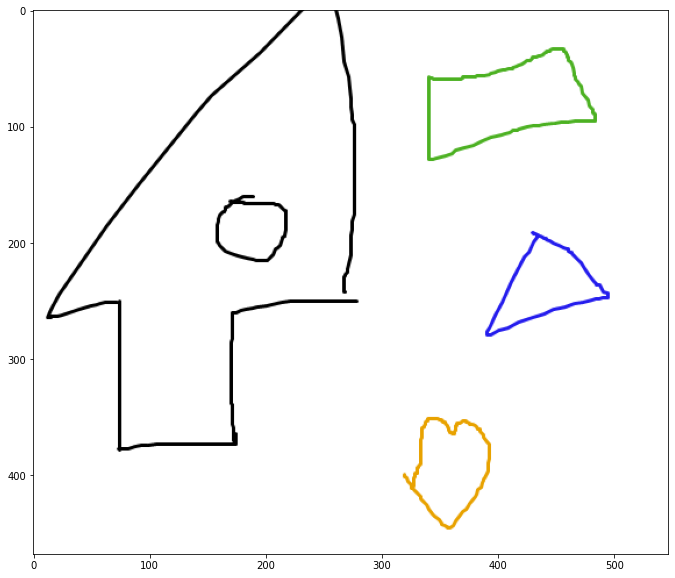

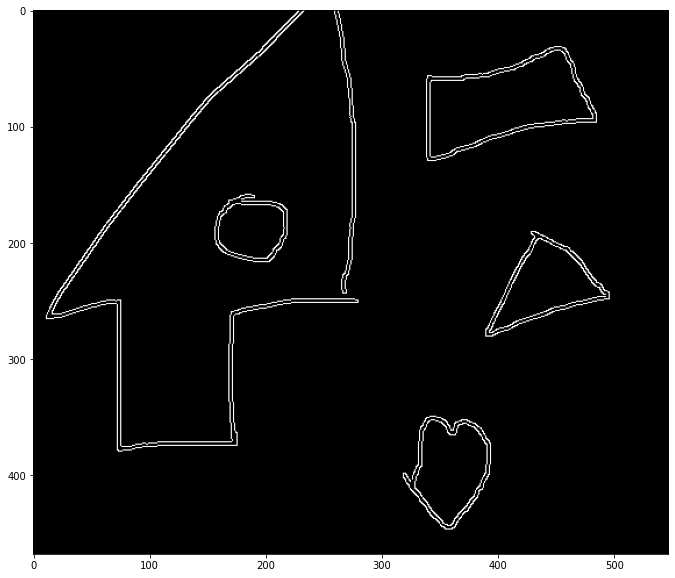

IndexError: index 474 is out of bounds for axis 0 with size 468

In [7]:
image = cv2.imread('Test.png')
edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

# Image normale
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

# Edges
plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray')
plt.show()

liste = flood_fill(edges, 250, 420)

colorie_pixels(image, liste, [0, 0, 254])

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [8]:
from PIL import Image
import numpy as np

def modify_fill(img, x, y, color):
    width, height = img.size
    new_color = tuple(color)
    original_color = img.getpixel((x, y))
    
    if original_color == new_color:
        return img

    pixels = np.array(img)
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        if pixels[cy, cx][:3] == original_color:
            pixels[cy, cx] = new_color
            if cx > 0:
                stack.append((cx - 1, cy))
            if cx < width - 1:
                stack.append((cx + 1, cy))
            if cy > 0:
                stack.append((cx, cy - 1))
            if cy < height - 1:
                stack.append((cx, cy + 1))
                
    new_img = Image.fromarray(pixels)
    return new_img
